An example of simple classification problem using a decision tree from sklearn. A set of Gaussian distributions is generated to simulate a simple separation of two classes using two features. Separate training and testing sets are generated to illustrate the concept of training and testing a learning algorithm.

In [1]:
#Based on examples from:
#   http://scikit-learn.org/stable/auto_examples/ensemble/plot_adaboost_twoclass.html
#   https://betatim.github.io/posts/sklearn-for-TMVA-users/
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns;

from sklearn import tree
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_gaussian_quantiles, make_classification
from sklearn.metrics import roc_curve, classification_report, roc_auc_score, auc

import matplotlib.pylab as pylab
import matplotlib.pyplot as plt
params = {'legend.fontsize': 'x-large',
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

# Construct training dataset
#X, y = make_gaussian_quantiles(cov=3.,
#                                 n_samples=500, n_features=2,
#                                 n_classes=2, random_state=1)
X, y = make_classification(n_samples=500, n_features=2, 
                           n_redundant=0, n_clusters_per_class=1,
                           n_classes=2,
                           n_informative=2,
                          random_state=1, class_sep=3)


# Construct testing dataset
Xt, yt = make_classification(n_samples=500, n_features=2, 
                           n_redundant=0, n_clusters_per_class=1,
                           n_classes=2,
                           n_informative=2,
                          random_state=2, class_sep=3)




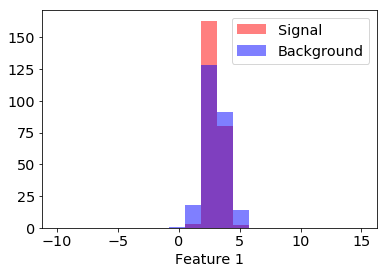

In [2]:

bins = np.linspace(-10, 15, 20)
plt.hist(X[y==0,0], bins=bins, label='Signal', alpha=0.5, color='red')
plt.hist(X[y==1,0], bins=bins, label='Background', alpha=0.5, color='blue')
plt.xlabel('Feature 1')
plt.legend()

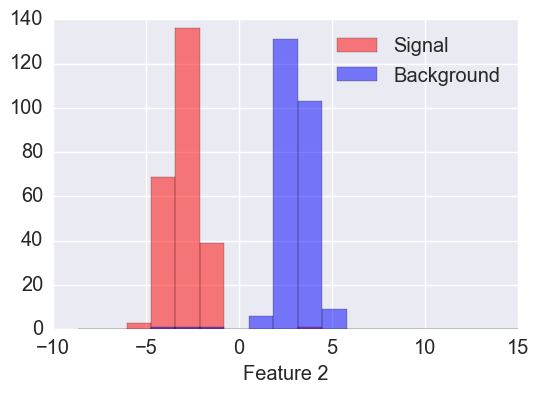

In [12]:
plt.hist(X[y==0,1], bins=bins, label='Signal', alpha=0.5, color='red')
plt.hist(X[y==1,1], bins=bins, label='Background', alpha=0.5, color='blue')
plt.xlabel('Feature 2')
plt.legend()

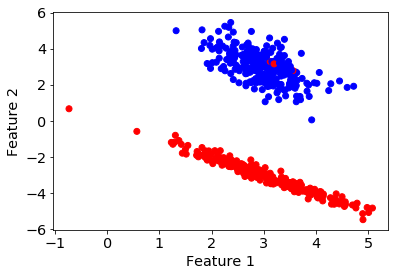

In [3]:
fig, ax = plt.subplots()
cols=[('blue' if y[i]==0 else 'red') for i in range(len(y))]
plt.scatter(X[:, 0], X[:, 1],  c=cols)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

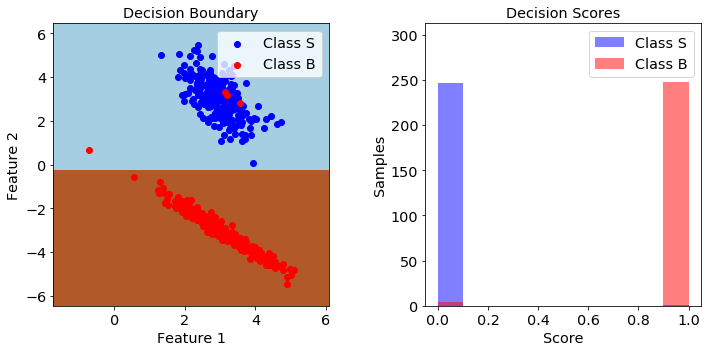

In [10]:

# Create and fit a decision tree
clf=DecisionTreeClassifier(max_depth=1)
clf.fit(X, y)

plot_colors = "br"
plot_step = 0.02
class_names = "SB"

plt.figure(figsize=(10, 5))

# Plot the decision boundaries
plt.subplot(121)
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                     np.arange(y_min, y_max, plot_step))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
plt.axis("tight")

# Plot the training points
for i, n, c in zip(range(2), class_names, plot_colors):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1],
                c=c, cmap=plt.cm.Paired,
                label="Class %s" % n)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.legend(loc='upper right')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Boundary')

# Plot the two-class decision scores
#twoclass_output = clf.decision_function(X)
twoclass_output = clf.predict(X)
plot_range = (twoclass_output.min(), twoclass_output.max())
plt.subplot(122)
for i, n, c in zip(range(2), class_names, plot_colors):
    plt.hist(twoclass_output[y == i],
             bins=10,
             range=plot_range,
             facecolor=c,
             label='Class %s' % n,
             alpha=.5)
x1, x2, y1, y2 = plt.axis()
plt.axis((x1, x2, y1, y2 * 1.2))
plt.legend(loc='upper right')
plt.ylabel('Samples')
plt.xlabel('Score')
plt.title('Decision Scores')

plt.tight_layout()
plt.subplots_adjust(wspace=0.35)
plt.show()

In [11]:
y_predicted = clf.predict(Xt)
print(classification_report(yt, y_predicted,
                            target_names=["Background", "Signal"]))

             precision    recall  f1-score   support

 Background       0.51      1.00      0.67       253
     Signal       0.00      0.00      0.00       247

avg / total       0.26      0.51      0.34       500



/Users/mbackes/anaconda3/envs/CMPP/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
